GitHub [link](https://github.com/MYUSER/MYPROJECT/)!

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [1]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib
#!conda install keras



Run the following cell to load the packages you will need.

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [11]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [67]:
#Create Classification Model : Feed Forward Neural Network
#Input size: 512
#Ouput size: 1

model = Sequential()
model.add(Dense(250, input_dim=512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training

Now, let's start our training.

In [68]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
3825/3825 [==============================] - 1s 281us/step - loss: 0.2230 - accuracy: 0.9077
Epoch 2/200
3825/3825 [==============================] - 0s 122us/step - loss: 0.0271 - accuracy: 0.9987
Epoch 3/200
3825/3825 [==============================] - 0s 118us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 4/200
3825/3825 [==============================] - 0s 121us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 5/200
3825/3825 [==============================] - 0s 123us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6/200
3825/3825 [==============================] - 0s 126us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/200
3825/3825 [==============================] - 0s 129us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/200
3825/3825 [==============================] - 0s 127us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/200
3825/3825 [==============================] - 0s 123us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/200
3825/3825 [==============================]

3825/3825 [==============================] - 1s 140us/step - loss: 1.1074e-05 - accuracy: 1.0000
Epoch 76/200
3825/3825 [==============================] - 1s 136us/step - loss: 1.0637e-05 - accuracy: 1.0000
Epoch 77/200
3825/3825 [==============================] - 1s 133us/step - loss: 1.0220e-05 - accuracy: 1.0000
Epoch 78/200
3825/3825 [==============================] - 1s 134us/step - loss: 9.8276e-06 - accuracy: 1.0000
Epoch 79/200
3825/3825 [==============================] - 0s 129us/step - loss: 9.4435e-06 - accuracy: 1.0000
Epoch 80/200
3825/3825 [==============================] - 0s 129us/step - loss: 9.0784e-06 - accuracy: 1.0000
Epoch 81/200
3825/3825 [==============================] - 1s 136us/step - loss: 8.7331e-06 - accuracy: 1.0000
Epoch 82/200
3825/3825 [==============================] - 1s 131us/step - loss: 8.3963e-06 - accuracy: 1.0000
Epoch 83/200
3825/3825 [==============================] - 0s 130us/step - loss: 8.0760e-06 - accuracy: 1.0000
Epoch 84/200
3825/3825 

3825/3825 [==============================] - 1s 135us/step - loss: 7.8279e-07 - accuracy: 1.0000
Epoch 150/200
3825/3825 [==============================] - 1s 133us/step - loss: 7.5721e-07 - accuracy: 1.0000
Epoch 151/200
3825/3825 [==============================] - 1s 133us/step - loss: 7.3244e-07 - accuracy: 1.0000
Epoch 152/200
3825/3825 [==============================] - 1s 134us/step - loss: 7.0838e-07 - accuracy: 1.0000
Epoch 153/200
3825/3825 [==============================] - 0s 127us/step - loss: 6.8523e-07 - accuracy: 1.0000
Epoch 154/200
3825/3825 [==============================] - 1s 132us/step - loss: 6.6298e-07 - accuracy: 1.0000
Epoch 155/200
3825/3825 [==============================] - 1s 134us/step - loss: 6.4143e-07 - accuracy: 1.0000
Epoch 156/200
3825/3825 [==============================] - 0s 127us/step - loss: 6.2064e-07 - accuracy: 1.0000
Epoch 157/200
3825/3825 [==============================] - 1s 132us/step - loss: 6.0038e-07 - accuracy: 1.0000
Epoch 158/200
3

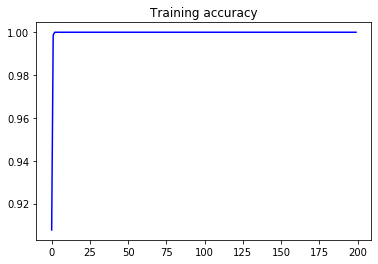

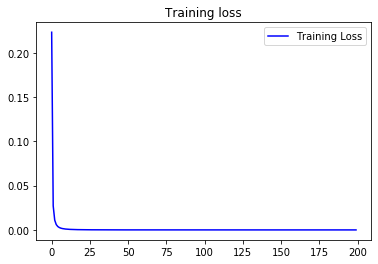

In [69]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set.

In [70]:


predictions = model.predict_classes(X_test)

# Classification model:
# Correct predictions will give difference of 0.  
# Incorrect will either be 1 or -1.

# Create vector of errors
error = np.sqrt((predictions-y_test)**2)

#Calculate incorrect test values
print(f"Number of incorrect predications is {np.sum(error)}")
#Calculate overall error rate
print(f"Error rate of prediction model is {np.sum(error)/np.size(error)} ")



Number of incorrect predications is 1.0
Error rate of prediction model is 0.0014814814814814814 


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

